## The goal of collecting this dataset:
The goal of collecting the Student Stress Factors dataset is to conduct a comprehensive analysis of the various factors that contribute to student stress. This dataset aims to identify patterns, relationships, and key drivers of stress among students by examining variables such as academic workload, personal life, social pressures, and mental health. The insights drawn from this data can help in developing strategies to reduce stress, improve student well-being, and enhance academic performance.

## The source of the dataset:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [73]:
import pandas as pd
df = pd.read_csv('Dataset/StressLevelDataset(in).csv')

## General information about the dataset:
Number of attributes: 21

Number of objects: 1100

Attribute types: All columns are integer types (int64)

Class label: stress_level

In [74]:
num_objects = len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})
print(f"Number of attributes: {len(df.columns)}")
print("\n")
print("Attributes and their types:")
print(attributes_info)
print("\n")
print(f"Number of objects: {num_objects}")

Number of attributes: 21


Attributes and their types:
                  Attribute Name Data Type
0                  anxiety_level     int64
1                    self_esteem     int64
2          mental_health_history     int64
3                     depression     int64
4                       headache     int64
5                 blood_pressure     int64
6                  sleep_quality     int64
7              breathing_problem     int64
8                    noise_level   float64
9              living_conditions   float64
10                        safety     int64
11                   basic_needs     int64
12          academic_performance     int64
13                    study_load   float64
14  teacher_student_relationship     int64
15        future_career_concerns     int64
16                social_support     int64
17                 peer_pressure     int64
18    extracurricular_activities     int64
19                      bullying     int64
20                  stress_level     int64

#### Check the Current Distribution of the Class Label:

In [75]:
# Check the current distribution of the class label (e.g., 'stress_level')
class_distribution = df['stress_level'].value_counts(normalize=True) * 100
print("Class label distribution in the full dataset:")
print(class_distribution)

Class label distribution in the full dataset:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


### Graphs:
#### Histograms

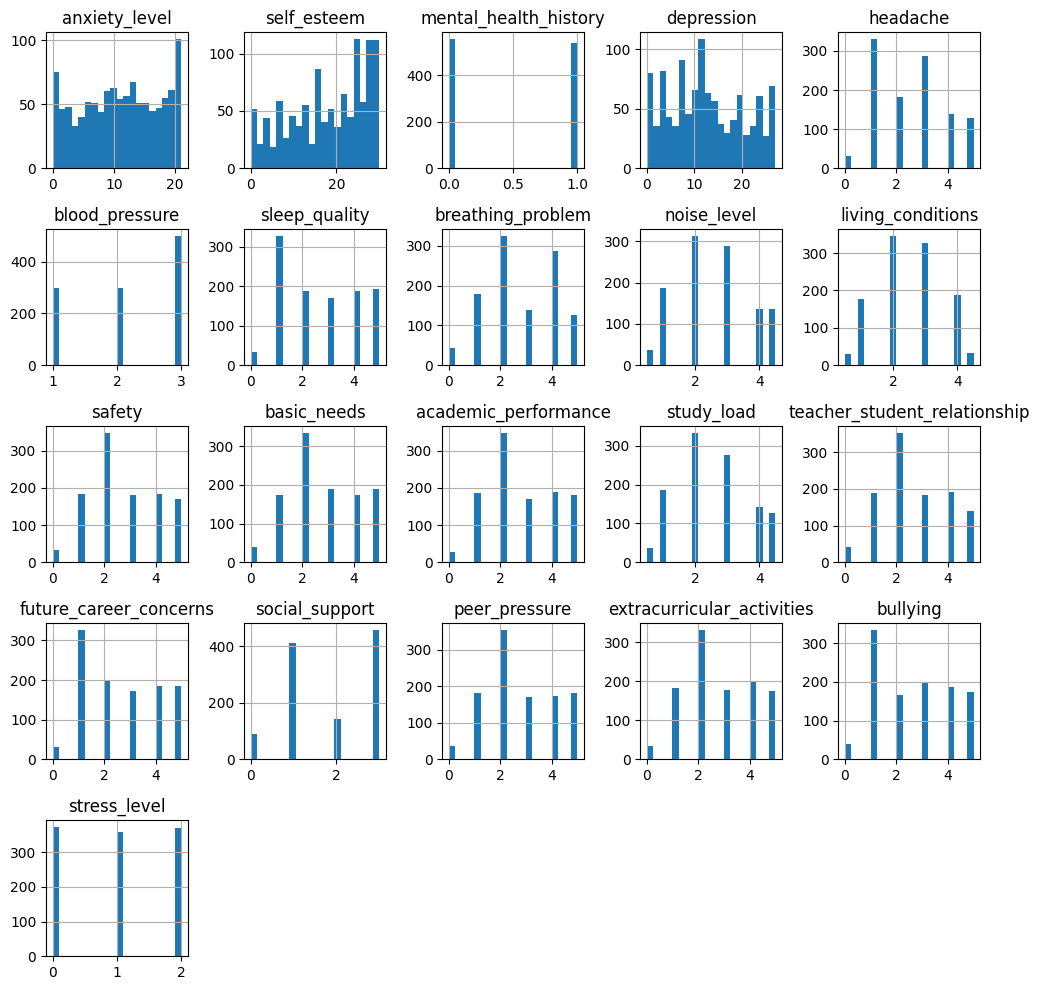

In [76]:
# Plot histograms for all numerical columns
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10), bins=20) # Create a histogram for all numeric variables in the DataFrame

plt.tight_layout() # Adjust layout to prevent overlap of plots

plt.show() # Display the histograms

#### Bar chart

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


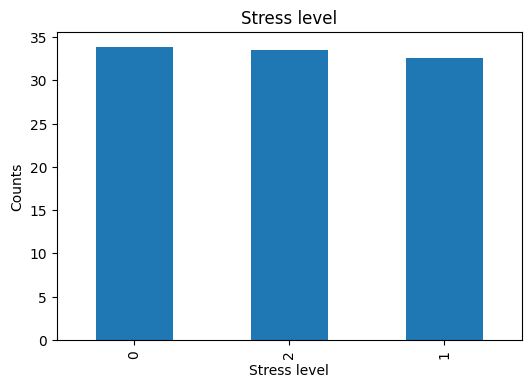

In [77]:
# plot to show distribution of the class label 
print(class_distribution)
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Stress level')
plt.xlabel('Stress level')
plt.ylabel('Counts')
plt.show()

<Axes: ylabel='proportion'>

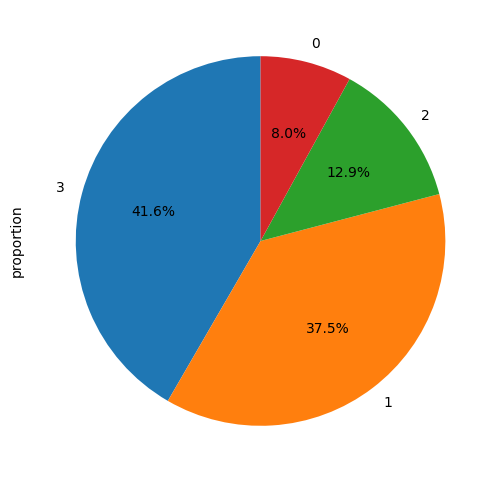

In [78]:
data2 = df['social_support'].value_counts(normalize=True)*100
data2.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)

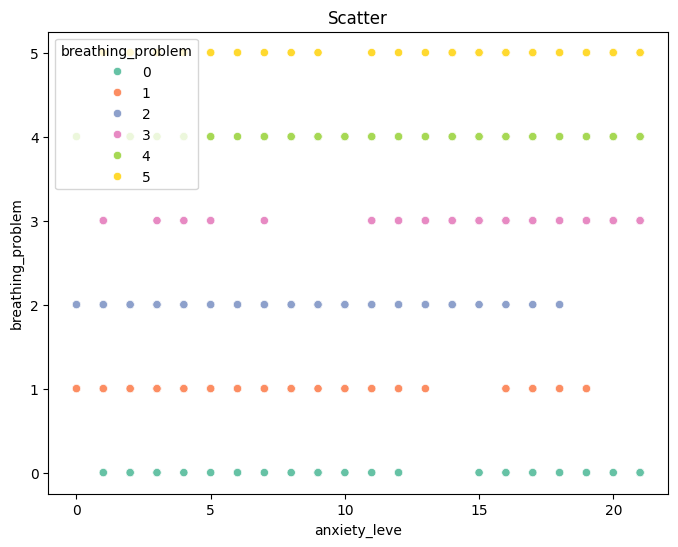

In [80]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='anxiety_level', y='breathing_problem', data=df, hue='breathing_problem', palette= 'Set2')

plt.title('Scatter')
plt.xlabel("anxiety_leve")
plt.ylabel("breathing_problem")
plt.show()

### Missing values:

In [14]:
# Check for missing values
missing_values = df.isnull().sum() # This creates a Series containing the count of missing values per column
print("Missing values per column:") # Print a message indicating that missing values will be displayed
print(missing_values[missing_values > 0]) # Filter and print columns that have missing values (greater than 0)

Missing values per column:
Series([], dtype: int64)


### Statistical summaries:

In [15]:
# Calculate statistical summaries (mean, variance, etc.)
stat_summary = df.describe().T  # Transpose the summary for better readability
stat_summary['variance'] = df.var() # Calculate variance for each column and add it to the statistical summary
print(stat_summary[['mean', 'std', 'variance']]) # Display the statistical summary including mean, standard deviation, and variance

                                   mean       std   variance
anxiety_level                 11.063636  6.117558  37.424518
self_esteem                   17.777273  8.944599  80.005852
mental_health_history          0.492727  0.500175   0.250175
depression                    12.555455  7.727008  59.706658
headache                       2.508182  1.409356   1.986284
blood_pressure                 2.181818  0.833575   0.694847
sleep_quality                  2.660000  1.548383   2.397489
breathing_problem              2.753636  1.400713   1.961998
noise_level                    2.649091  1.328127   1.763921
living_conditions              2.518182  1.119208   1.252626
safety                         2.737273  1.406171   1.977317
basic_needs                    2.772727  1.433761   2.055670
academic_performance           2.772727  1.414594   2.001075
study_load                     2.621818  1.315781   1.731280
teacher_student_relationship   2.648182  1.384579   1.917058
future_career_concerns  

In [18]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)
df.to_csv('Cleaned_StressLevelDataset.csv', index = False)

Number of duplicate rows: 0


In [20]:
import numpy as np
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = df.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(df[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(df)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 173 rows with outliers
living_conditions: 62 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 165 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 400


In [35]:
outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)

numeric_columns = df.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(df[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(df)

print("Outlier Counts.:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")


print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts.:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 0 rows with outliers
living_conditions: 0 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 0 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 0


# Feature Selection
The number of available features is 20, and the feature selection includes blood pressure, sleep quality, future career concerns, bullying, and stress level.
 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif 
df = pd.read_csv('Cleaned_StressLevelDataset.csv')

# Read dataset
df = pd.read_csv('Cleaned_StressLevelDataset.csv')

# Separate features from target variable
X = df.drop(columns=['anxiety_level'])
y = df['anxiety_level']

# Check the number of features
n_features = X.shape[1]
print(' Number of features available :', n_features)

# Specify the number of features to choose
num_features_to_select = min(5, n_features)  # Choose the least between 5 and the actual number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Get selected feature indicators
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_indices]

print('Selected Features:', selected_features)



Number of features available: 20
Selected Features: Index(['blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying',
 'stress_level'], dtype='object')


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Data after normalization:")
print(normalized_df.head())

normalized_df.to_csv('normalized_dataset.csv', index=False)

Data after normalization:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.666667     0.666667                    0.0    0.407407       0.4   
1       0.714286     0.266667                    1.0    0.555556       1.0   
2       0.571429     0.600000                    1.0    0.518519       0.4   
3       0.761905     0.400000                    1.0    0.555556       0.8   
4       0.761905     0.933333                    0.0    0.259259       0.4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.0            0.4                0.8        0.375   
1             1.0            0.2                0.8        0.625   
2             0.0            0.4                0.4        0.375   
3             1.0            0.2                0.6        0.875   
4             1.0            1.0                0.2        0.625   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0              0.625

In [24]:
aggregated_df = df.groupby('stress_level').agg({
    'anxiety_level': 'mean',  
    'depression': 'mean',    
    'self_esteem': 'mean',    
    'bullying': 'sum'        
})

print("Aggregated data:")
print(aggregated_df)

aggregated_df.to_csv('aggregated_dataset.csv', index=True)

Aggregated data:
              anxiety_level  depression  self_esteem  bullying
stress_level                                                  
0                  5.431635    6.013405    25.252011       468
1                 11.430168   11.874302    19.262570       915
2                 16.401084   19.829268     8.780488      1496


In [25]:
df['anxiety_level_binned'] = pd.cut(df['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])

print("Data after discretization:")
print(df[['anxiety_level', 'anxiety_level_binned']].head())

df.to_csv('discretized_dataset.csv', index=False)

Data after discretization:
   anxiety_level anxiety_level_binned
0             14               Medium
1             15                 High
2             12               Medium
3             16                 High
4             16                 High


In [34]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['stress_level'].sort_values(ascending=False)

print("Correlation coefficients with stress_level:")
print(correlation_with_target)

Correlation coefficients with stress_level:
stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.689143
study_load                      0.657820
mental_health_history           0.648644
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.616766
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64
